### 1. A* Program

In [14]:

def aStarAlgo(start_node, stop_node):
    open_set = set(start_node) # {A}, len{open_set}=1
    closed_set = set()
    g = {} # store the distance from starting node
    parents = {}
    g[start_node] = 0
    parents[start_node] = start_node # parents['A']='A"

    while len(open_set) > 0 :
        n = None

        for v in open_set: # v='B'/'F'
            if n == None or g[v] + heuristic(v) < g[n] + heuristic(n):
                n = v # n='A'

        if n == stop_node or Graph_nodes[n] == None:
            pass
        else:
            for (m, weight) in get_neighbors(n):
             # nodes 'm' not in first and last set are added to first
             # n is set its parent
                if m not in open_set and m not in closed_set:
                    open_set.add(m)      # m=B weight=6 {'F','B','A'} len{open_set}=2
                    parents[m] = n       # parents={'A':A,'B':A} len{parent}=2
                    g[m] = g[n] + weight # g={'A':0,'B':6, 'F':3} len{g}=2


            #for each node m,compare its distance from start i.e g(m) to the
            #from start through n node
                else:
                    if g[m] > g[n] + weight:
                    #update g(m)
                        g[m] = g[n] + weight
                    #change parent of m to n
                        parents[m] = n

                    #if m in closed set,remove and add to open
                        if m in closed_set:
                            closed_set.remove(m)
                            open_set.add(m)

        if n == None:
            print('Path does not exist!')
            return None

        # if the current node is the stop_node
        # then we begin reconstructin the path from it to the start_node
        if n == stop_node:
            path = []

            while parents[n] != n:
                path.append(n)
                n = parents[n]

            path.append(start_node)

            path.reverse()

            print('Path found: {}'.format(path))
            return path


        # remove n from the open_list, and add it to closed_list
        # because all of his neighbors were inspected
        open_set.remove(n)# {'F','B'} len=2
        closed_set.add(n) #{A} len=1

    print('Path does not exist!')
    return None

#define fuction to return neighbor and its distance
#from the passed node
def get_neighbors(v):
    if v in Graph_nodes:
        return Graph_nodes[v]
    else:
        return None
#for simplicity we ll consider heuristic distances given
#and this function returns heuristic distance for all nodes
 
def heuristic(n):
    H_dist = {
        'A': 1,
        'B': 1,
        'C': 1,
        'D': 1,
       
    }

    return H_dist[n]

#Describe your graph here
Graph_nodes = {
    
    'A': [('B', 1), ('C', 3), ('D' , 7)],
    'B': [('D', 5)],
    'C': [('D', 12)]
    

}
aStarAlgo('A', 'D')

Path found: ['A', 'B', 'D']


['A', 'B', 'D']

## A* alternative

In [15]:
class Graph:
    def __init__(self, adjac_lst):
        self.adjac_lst = adjac_lst

    def get_neighbor(self, v):
        return self.adjac_lst[v]

    def h(self, n):
        H = {
            'A': 1,
            'B': 1,
            'C': 1,
            'D': 1
        }
        return H[n]

    def a_star(self,start,stop):
        open_lst= set(start)
        closed_lst= set()
        dist ={}
        prenode={}
        

        dist[start]=0 #distance form the start to start is 0.
        prenode[start]= start
        while len(open_lst)>0:
            n= None
            for v in open_lst:
                if n==None or dist[v]+self.h(v)<=dist[n]:
                    n=v
            if(n==None):
                print('Path does not exist')
                return None
            if n == stop:
                reconst_path= []
                while prenode[n] != n :
                    reconst_path.append(n)
                    n = prenode[n]
                reconst_path.append(start)
                reconst_path.reverse()
                print('Path found :{}'.format(reconst_path))
                return #reconst_path

            for(m,weight) in self.get_neighbor(n):
                if m not in open_lst and m not in closed_lst:
                    open_lst.add(m)
                    prenode[m]=n
                    dist[m]= dist[n]+ weight
                else:
                    if dist[m]> dist[n]+weight:
                        dist[m]= dist[n]+weight
                        prenode[m]=n
                        if m in closed_lst:
                            closed_lst.remove(m)
                            open_lst.add (m)
            open_lst.remove(n)
            closed_lst.add(n)
        print('Path does not exist')
        return None

adjac_lst = {
    'A' : [ ('B' , 1), ('C', 3), ('D', 7)],
    'B' : [('D' , 5)],
    'C' : [('D' , 12)]
}

graph1 = Graph(adjac_lst)
graph1.a_star('A', 'D')

Path found :['A', 'B', 'D']


### 2. AO* Program

In [16]:
def recAOStar(n):
    print("Expending node ", n)
    and_nodes = []
    or_nodes= []
    if n in allNodes:
        if 'AND' in allNodes[n]:
            and_nodes= allNodes[n]['AND']
        if 'OR' in allNodes[n]:
            or_nodes= allNodes[n]['OR']
    # return on end of the nodes
    if len(and_nodes)==0 and len(or_nodes)==0:
        return
    solvable = False
    marked = {}
    while not solvable:
        if len(marked) == len(and_nodes)+len(or_nodes):
            min_cost_least, min_cost_least_group= least_cost_group(and_nodes,or_nodes,{})
            solvable = True
            change_heuristic(n,min_cost_least)
            optimal_child_group[n]=min_cost_least_group
            continue
        min_cost , min_cost_group =  least_cost_group(and_nodes,or_nodes,marked)
        is_expanded = False
        # print min cost group
        if len(min_cost_group)>1:
            if min_cost_group[0] in allNodes:
                is_expanded = True
                recAOStar(min_cost_group[0])
            if min_cost_group[1] in allNodes:
                is_expanded = True
                recAOStar(min_cost_group[1])
        else:
            if min_cost_group in allNodes:
                is_expanded= True
                recAOStar(min_cost_group)

        if is_expanded:
            min_cost_varify, min_cost_group_varify= least_cost_group(and_nodes,or_nodes,{})
            if min_cost_group ==min_cost_group_varify:
                solvable= True
                change_heuristic(n, min_cost_varify)
                optimal_child_group[n] = min_cost_group
        else:
            solvable = True
            change_heuristic(n, min_cost)
            optimal_child_group[n] = min_cost_group

        marked[min_cost_group] =1
    return heuristic(n)

def least_cost_group(and_nodes, or_nodes, marked):
    node_wise_cost = {}
    for node_pair in and_nodes:
        if  not node_pair[0]+node_pair[1] in marked:
            cost = 0
            cost = cost + heuristic(node_pair[0])+heuristic(node_pair[1])+2
            node_wise_cost[node_pair[0]+node_pair[1]]=cost

    for node in or_nodes:
        if not node in marked:
            cost = 0
            cost = cost + heuristic(node)+1
            node_wise_cost[node] = cost
    min_cost = 999999
    min_cost_group = None
    for costKey in node_wise_cost:
        if node_wise_cost[costKey]< min_cost:
            min_cost = node_wise_cost[costKey]
            min_cost_group = costKey
    return [min_cost, min_cost_group]

def heuristic(n):
    return M_dist[n]

def change_heuristic(n,cost):
    M_dist[n]= cost
    return

def print_path(node):
    print(optimal_child_group[node], end = "")
    node = optimal_child_group[node]

    if len(node)>1:
        if node[0] in optimal_child_group:
            print('->', end='')
            print_path(node[0])
        if node[1] in optimal_child_group:
            print('->', end='')
            print_path(node[1])
    else:
        if node in optimal_child_group:
            print('->', end='')
            print_path(node)

M_dist= {
    'A':-1,
    'B':4,
    'C':2,
    'D':3,
    'E':6,
    'F':8,
    'G':2,
    'H':0,
    'I':0,
    'J':0
}

allNodes = {
    'A': {'AND': [('C','D')], 'OR':['B']},
    'B': { 'OR': ['E','F']},
    'C': {'OR': ['G'], 'AND': [('H', 'I')]},
    'D': { 'OR': ['J']}
}

optimal_child_group = {}

optimal_cost = recAOStar('A')

print('Nodes which give optimal cost are ')
print_path('A')
print('\noptimal cost is ::', optimal_cost)
            

Expending node  A
Expending node  B
Expending node  C
Expending node  D
Nodes which give optimal cost are 
CD->HI->J
optimal cost is :: 5


### 3. Candidate Elimination Program

In [17]:

import csv
arr=[]

with open('./trainingdata.csv','r') as csvFile:
    reader = csv.reader(csvFile)
    for row in reader:
        arr.append(row)
        print(row)

a= arr[1:]
num_attributes= len(a[0])-1
print('the initial value of the hypothesis:' )
S= ['0']*num_attributes
G=['?']*num_attributes
print('most specific hypothesis is S0:',S)
print('most general hypothesis is G0:',G)

for j in range (num_attributes):
    S[j]=a[0][j]

print('candidate Elimination hypothesis version space')
temp= []

for i in range (len(a)):
    print('_________________________________________________')
    if a[i][num_attributes] == "Yes":
        for j in range(num_attributes):
            if a[i][j]!=S[j]:
                S[j]='?'
        for j in range (num_attributes):
            for k in range(1,len(temp)):
                if temp[k][j]!='?' and temp[k][j]!= S[j]:
                    del temp[k]
        print('S{}:'.format(i+1),S)
        if len(temp)==0:
            print('G{}:'.format(i+1),G)
        else:
            print('G{}:'.format(i+1),temp)
    
    if a[i][num_attributes] == "No":
        for j in range(num_attributes):
            if S[j]!=a[i][j] and S[j]!='?':
                G[j]= S[j]
                temp.append(G)
                G= ['?']* num_attributes
        print('S{}:'.format(i+1),S)
        print('G{}'.format(i+1),temp)






['sky', 'airTemp', 'humidity', 'wind', 'water', 'forecast', 'enjoySport']
['Sunny', 'Warm', 'Normal', 'Strong', 'Warm', 'Same', 'Yes']
['Sunny', 'Warm', 'High', 'Strong', 'Warm', 'Same', 'Yes']
['Rainy', 'Cold', 'High', 'Strong', 'Warm', 'Change', 'No']
['Sunny', 'Warm', 'High', 'Strong', 'Cool', 'Change', 'Yes']
the initial value of the hypothesis:
most specific hypothesis is S0: ['0', '0', '0', '0', '0', '0']
most general hypothesis is G0: ['?', '?', '?', '?', '?', '?']
candidate Elimination hypothesis version space
_________________________________________________
S1: ['Sunny', 'Warm', 'Normal', 'Strong', 'Warm', 'Same']
G1: ['?', '?', '?', '?', '?', '?']
_________________________________________________
S2: ['Sunny', 'Warm', '?', 'Strong', 'Warm', 'Same']
G2: ['?', '?', '?', '?', '?', '?']
_________________________________________________
S3: ['Sunny', 'Warm', '?', 'Strong', 'Warm', 'Same']
G3 [['Sunny', '?', '?', '?', '?', '?'], ['?', 'Warm', '?', '?', '?', '?'], ['?', '?', '?', '

### 4. Decision Tree Program ID3 Algorithm

In [18]:
import numpy as np
import pandas as pd
eps = np.finfo(float).eps
#print(eps)
from numpy import log2 as log
outlook = 'overcast,overcast,overcast,overcast,rainy,rainy,rainy,rainy,rainy,sunny,sunny,sunny,sunny,sunny'.split(',')
temp = 'hot,cool,mild,hot,mild,cool,cool,mild,mild,hot,hot,mild,cool,mild'.split(',')
humidity = 'high,normal,high,normal,high,normal,normal,normal,high,high,high,high,normal,normal'.split(',')
windy = 'FALSE,TRUE,TRUE,FALSE,FALSE,FALSE,TRUE,FALSE,TRUE,FALSE,TRUE,FALSE,FALSE,TRUE'.split(',')
play = 'yes,yes,yes,yes,yes,yes,no,yes,no,no,no,no,yes,yes'.split(',')
dataset ={'outlook':outlook,'temp':temp,'humidity':humidity,'windy':windy,'play':play}
df = pd.DataFrame(dataset,columns=['outlook','temp','humidity','windy','play'])
print(df)
def find_entropy(df):
    Class = df.keys()[-1] #To make the code generic, changing target variable class name
    entropy = 0
    values = df[Class].unique()
    for value in values:
        fraction = df[Class].value_counts()[value]/len(df[Class])
        entropy += -fraction*np.log2(fraction)
    return entropy
 
 
def find_entropy_attribute(df,attribute):
    Class = df.keys()[-1] #To make the code generic, changing target variable class name
    target_variables = df[Class].unique() #This gives all 'Yes' and 'No'
    variables = df[attribute].unique() #This gives different features in that attribute (like 'Hot','Cold' in Temperature)
    entropy2 = 0
    for variable in variables:
        entropy = 0
        for target_variable in target_variables:
            num = len(df[attribute][df[attribute]==variable][df[Class] ==target_variable])
            den = len(df[attribute][df[attribute]==variable])
            fraction = num/(den+eps)
            entropy += -fraction*log(fraction+eps)
        fraction2 = den/len(df)
        entropy2 += -fraction2*entropy
    return abs(entropy2)

def find_winner(df):
    Entropy_att = []
    IG = []
    for key in df.keys()[:-1]:
    # Entropy_att.append(find_entropy_attribute(df,key))
        IG.append(find_entropy(df)-find_entropy_attribute(df,key))
    return df.keys()[:-1][np.argmax(IG)]

def get_subtable(df, node,value):
    return df[df[node] == value].reset_index(drop=True)

def buildTree(df,tree=None): 
    Class = df.keys()[-1] 
    
    #Get attribute with maximum information gain
    node = find_winner(df)
    attValue = np.unique(df[node])
    if tree is None: 
        tree={}
        tree[node] = {}
    for value in attValue:
 
        subtable = get_subtable(df,node,value)
 
        clValue,counts = np.unique(subtable[Class],return_counts=True) 
 
        if len(counts)==1:
            tree[node][value] = clValue[0] 
        else: 
            tree[node][value] = buildTree(subtable) #Calling the function recursively 
 
    return tree 
t=buildTree(df)
import pprint
pprint.pprint(t)

     outlook  temp humidity  windy play
0   overcast   hot     high  FALSE  yes
1   overcast  cool   normal   TRUE  yes
2   overcast  mild     high   TRUE  yes
3   overcast   hot   normal  FALSE  yes
4      rainy  mild     high  FALSE  yes
5      rainy  cool   normal  FALSE  yes
6      rainy  cool   normal   TRUE   no
7      rainy  mild   normal  FALSE  yes
8      rainy  mild     high   TRUE   no
9      sunny   hot     high  FALSE   no
10     sunny   hot     high   TRUE   no
11     sunny  mild     high  FALSE   no
12     sunny  cool   normal  FALSE  yes
13     sunny  mild   normal   TRUE  yes
{'outlook': {'overcast': 'yes',
             'rainy': {'windy': {'FALSE': 'yes', 'TRUE': 'no'}},
             'sunny': {'humidity': {'high': 'no', 'normal': 'yes'}}}}


### 5. Back Propagation ANN

In [19]:
''' Backpropagation for the ANN'''
import numpy as np

X= np.array(([2,9], [1,5], [3,6]),dtype= float)
y = np.array(([92],[86],[89]), dtype= float)

# normalization
X= X/np.amax(X, axis=0)
y= y/100

def sigmoid(x):
    return 1/(1+np.exp(-x))

def derivative_sigmoid(x):
    return x*(1-x)

#initialise the data

epoch = 7000
lr= 0.1
#number of nurons in layers
ip_l =2
hi_l=3
op_l= 1

wh = np.random.uniform(size=(ip_l,hi_l))
print('weights hideen layer', wh)
bh = np.random.uniform(size= (1,hi_l))
print('biases of hidden layer', bh)
wout= np.random.uniform(size = (hi_l,op_l))
print('weights outer layer', wout)
bout= np.random.uniform(size= (1,op_l))
print('biases outer layer', bout)


for i in range(epoch):
    #forward propageation
    hinp1= np.dot(X,wh)
    hinp= hinp1+bh
    hlayer_act= sigmoid(hinp)
    
    outinp1= np.dot(hlayer_act,wout)
    outinp= outinp1+bout
    output = sigmoid(outinp)

    #back propagation
    EO = y- output
    outgrad= derivative_sigmoid(output)
    d_output= EO*outgrad
    #EH= d_output.dot(wout.T)
    EH= np.dot(d_output, wout.T)
    hiddengrad= derivative_sigmoid(hlayer_act)
    d_hidden_layer= EH*hiddengrad
    #updation of the weights
    #wout += hlayer_act.T.dot(d_output)
    wout+= np.dot(hlayer_act.T,d_output)
    #wh+= X.T.dot(d_hidden_layer)*lr6666
    wh+= np.dot(X.T,d_hidden_layer)*lr
print('...............................................................................')
print("Input: \n"+str(X))
print("\n\nActual Output: \n"+ str(y))
print ("\n\nPredicted Output: \n"+ str(output))
print('\n'*2)

weights hideen layer [[0.50337267 0.94929447 0.73929146]
 [0.67846098 0.86933869 0.05570067]]
biases of hidden layer [[0.37811721 0.25906548 0.582201  ]]
weights outer layer [[0.23271266]
 [0.6225344 ]
 [0.74681881]]
biases outer layer [[0.13271519]]
...............................................................................
Input: 
[[0.66666667 1.        ]
 [0.33333333 0.55555556]
 [1.         0.66666667]]


Actual Output: 
[[0.92]
 [0.86]
 [0.89]]


Predicted Output: 
[[0.89689336]
 [0.87390091]
 [0.89833845]]





### 6 BAYESIAN CLASSIFIER

In [1]:
import pandas as pd
from sklearn import tree
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB

# Load Data from CSV
data = pd.read_csv('./diabetes.csv')
#print("The first 5 Values of data is :\n", data.head())

# obtain train data and train output
X = data.iloc[:, :-1]
print("\nThe First 5 values of the train data is\n", X.head())

y = data.Outcome
#y= data.iloc(:, -1)
print("\nThe First 5 values of train output is\n", y.head())

# # convert them in numbers
# le_outlook = LabelEncoder()
# X.Outlook = le_outlook.fit_transform(X.Outlook)

# le_Temperature = LabelEncoder()
# X.Temperature = le_Temperature.fit_transform(X.Temperature)

# le_Humidity = LabelEncoder()
# X.Humidity = le_Humidity.fit_transform(X.Humidity)

# le_Windy = LabelEncoder()
# X.Windy = le_Windy.fit_transform(X.Windy)

# print("\nNow the Train data=   is\n", X.head())

# le_PlayTennis = LabelEncoder()
# y = le_PlayTennis.fit_transform(y)
# print("\nNow the Train output is\n",y)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.20)

classifier = GaussianNB()
classifier.fit(X_train, y_train)

from sklearn.metrics import accuracy_score
pred= classifier.predict(X_test)
print(pred[:5])
print("Accuracy is:", accuracy_score(classifier.predict(X_test), y_test))


The First 5 values of the train data is
    Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  
0                     0.627   50  
1                     0.351   31  
2                     0.672   32  
3                     0.167   21  
4                     2.288   33  

The First 5 values of train output is
 0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64
[0 0 0 0 1]
Accuracy is: 0.7792207792207793


### 7 EM vs CLUSTERING

     Sepal_Length  Sepal_Width  Petal_Length  Petal_Width
0             5.1          3.5           1.4          0.2
1             4.9          3.0           1.4          0.2
2             4.7          3.2           1.3          0.2
3             4.6          3.1           1.5          0.2
4             5.0          3.6           1.4          0.2
..            ...          ...           ...          ...
145           6.7          3.0           5.2          2.3
146           6.3          2.5           5.0          1.9
147           6.5          3.0           5.2          2.0
148           6.2          3.4           5.4          2.3
149           5.9          3.0           5.1          1.8

[150 rows x 4 columns]
Observation: The GMM using EM algorithm based clustering matched the true labels more closely than the Kmeans.


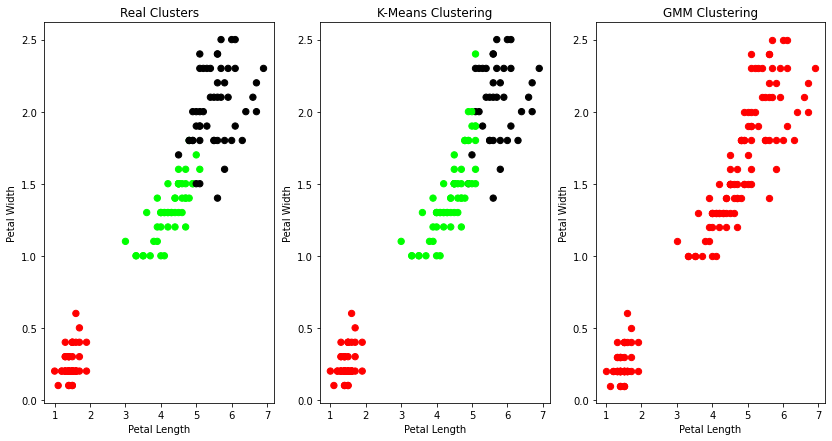

In [4]:
import matplotlib.pyplot as plt 
from sklearn import datasets 
from sklearn.cluster import KMeans 
import pandas as pd
import numpy as np

# import some data to play with 
iris = datasets.load_iris()
X = pd.DataFrame(iris.data)

X.columns = ['Sepal_Length','Sepal_Width','Petal_Length','Petal_Width'] 
print(X)
y = pd.DataFrame(iris.target)
y.columns = ['Targets']

# Build the K Means Model
model = KMeans(n_clusters=3)
model.fit(X) # model.labels_ : Gives cluster no for which samples belongs to

# # Visualise the clustering results
plt.figure(figsize=(14,7))
colormap = np.array(['red', 'lime', 'black'])

# Plot the Original Classifications using Petal features
plt.subplot(1, 3, 1)
plt.scatter(X.Petal_Length, X.Petal_Width, c=colormap[y.Targets], s=40) 
plt.title('Real Clusters')
plt.xlabel('Petal Length') 
plt.ylabel('Petal Width')

# Plot the Models Classifications
plt.subplot(1, 3, 2)
plt.scatter(X.Petal_Length, X.Petal_Width, c=colormap[model.labels_], s=40) 
plt.title('K-Means Clustering')
plt.xlabel('Petal Length') 
plt.ylabel('Petal Width')

# General EM for GMM
from sklearn import preprocessing

# transform your data such that its distribution will have a # mean value 0 and standard deviation of 1.
scaler = preprocessing.StandardScaler() 
scaler.fit(X)
xsa = scaler.transform(X)
xs = pd.DataFrame(xsa, columns = X.columns)
from sklearn.mixture import GaussianMixture 
gmm = GaussianMixture(n_components=40) 
gmm.fit(xs)
plt.subplot(1, 3, 3)
plt.scatter(X.Petal_Length, X.Petal_Width, c=colormap[0], s=40) 
plt.title('GMM Clustering')
plt.xlabel('Petal Length') 
plt.ylabel('Petal Width')

print('Observation: The GMM using EM algorithm based clustering matched the true labels more closely than the Kmeans.')

### 8 KNN

In [6]:
from sklearn.model_selection import train_test_split 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn import datasets
iris=datasets.load_iris() 
print("Iris Data set loaded...")
#print(iris.data)
print(iris.target)
x_train, x_test, y_train, y_test = train_test_split(iris.data,iris.target,test_size=0.1)
#random_state=0
for i in range(len(iris.target_names)):
    print("Label", i , "-",str(iris.target_names[i]))
classifier = KNeighborsClassifier(n_neighbors=2)
classifier.fit(x_train, y_train)
y_pred=classifier.predict(x_test)
print("Results of Classification using K-nn with K=1 ") 
for r in range(0,len(x_test)):
    print(" Sample:", str(x_test[r]), " Actual-label:", str(y_test[r])," Predicted-label:", str(y_pred[r]))

print("Classification Accuracy :" , classifier.score(x_test,y_test))

Iris Data set loaded...
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
Label 0 - setosa
Label 1 - versicolor
Label 2 - virginica
Results of Classification using K-nn with K=1 
 Sample: [4.7 3.2 1.3 0.2]  Actual-label: 0  Predicted-label: 0
 Sample: [6.3 2.3 4.4 1.3]  Actual-label: 1  Predicted-label: 1
 Sample: [5.1 3.7 1.5 0.4]  Actual-label: 0  Predicted-label: 0
 Sample: [5.5 3.5 1.3 0.2]  Actual-label: 0  Predicted-label: 0
 Sample: [4.4 3.  1.3 0.2]  Actual-label: 0  Predicted-label: 0
 Sample: [5.4 3.  4.5 1.5]  Actual-label: 1  Predicted-label: 1
 Sample: [5.4 3.4 1.5 0.4]  Actual-label: 0  Predicted-label: 0
 Sample: [5.6 2.8 4.9 2. ]  Actual-label: 2  Predicted-label: 2
 Sample: [5.7 2.8 4.1 1.3]  Actual-label: 1  Predicte

### 9 Regrression

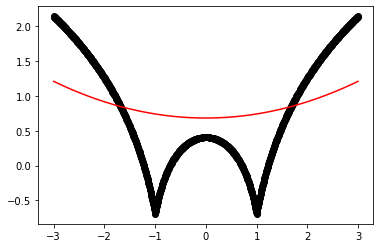

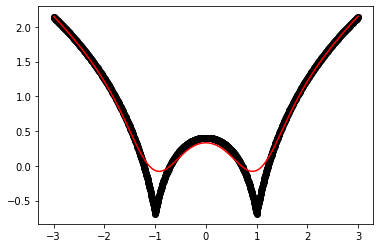

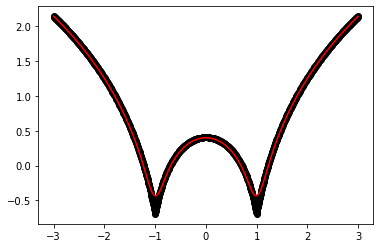

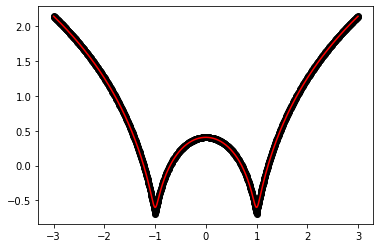

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def local_regression(x0, X, Y, tau):
    x0 = [1, x0]   
    X = [[1, i] for i in X]
    X = np.asarray(X)
    xw = (X.T) * np.exp(np.sum((X - x0) ** 2, axis=1) / (-2 * tau))
    beta = np.linalg.pinv(xw @ X) @ xw @ Y @ x0  
    return beta    

def draw(tau):
    prediction = [local_regression(x0, X, Y, tau) for x0 in domain]
    plt.plot(X, Y, 'o', color='black')
    plt.plot(domain, prediction, color='red')
    plt.show()

X = np.linspace(-3, 3, num=1000)
domain = X
Y = np.log(np.abs(X ** 2 - 1) + .5)

draw(10)
draw(0.1)
draw(0.01)
draw(0.001)